In [2]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Combine all trip info parts

In [2]:
df_folder = '/home/foolingeng/ruien/data/grab-posisi/jakarta'
df_paths = [i for i in glob.glob(
        os.path.join(df_folder, "*part*.parquet"), recursive=True)]
df_paths

['/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00009-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00000-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00005-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00008-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00001-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_part-00007-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet.parquet',
 '/home/foolingeng/ruien/data/grab

In [38]:
df = None
for path in df_paths:
    new_df = pd.read_parquet(path).dropna()
    # new_df['pingtimestamp'] = pd.to_datetime(new_df['pingtimestamp'], unit='s')
    if df is None:
        df = new_df
    else:
        df = pd.concat((df, new_df))

# df.to_parquet('trip_info_jakarta.parquet')
df.shape

(559928, 15)

In [37]:
df.columns

Index(['trj_id', 'driving_mode', 'osname', 'start_time', 'end_time', 'eta',
       'start_lat', 'end_lat', 'start_lng', 'end_lng', 'time_of_day',
       'day_of_week', 'avg_speed', 'median_speed', 'distance'],
      dtype='object')

### Read data

In [7]:
df = pd.read_parquet('/home/foolingeng/ruien/data/grab-posisi/jakarta/trip_info_jakarta.parquet')
# df = df[df['eta'] < 70]
print(df.shape)
df

(559928, 15)


,trj_id,driving_mode,osname,start_time,end_time,eta,start_lat,end_lat,start_lng,end_lng,time_of_day,day_of_week,avg_speed,median_speed,distance
trj_id,,,,,,,,,,,,,,,
1,1,car,android,2019-04-11 14:17:44,2019-04-11 14:35:56,18,-6.197948,-6.239703,106.769002,106.801948,14,3,7.381212,8.140000,7.021551
10000,10000,motorcycle,ios,2019-04-16 00:51:27,2019-04-16 01:00:42,9,-6.248374,-6.229830,106.930931,106.947000,0,1,8.567586,8.250000,4.034932
10002,10002,motorcycle,android,2019-04-08 05:55:43,2019-04-08 06:16:52,21,-6.249765,-6.235785,106.968023,106.897452,5,0,6.516791,7.050739,8.482775
10003,10003,car,android,2019-04-19 10:52:47,2019-04-19 11:24:36,31,-6.174653,-6.318539,106.897373,106.852352,10,4,12.047796,12.040000,21.975494
10006,10006,motorcycle,ios,2019-04-14 23:07:44,2019-04-14 23:16:26,8,-6.177141,-6.154198,106.644257,106.653433,23,6,7.349535,7.670000,3.830572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,motorcycle,ios,2019-04-09 05:21:34,2019-04-09 05:34:47,13,-6.402891,-6.379160,106.882269,106.847275,5,1,7.580303,6.670000,5.655897
9996,9996,motorcycle,android,2019-04-12 11:13:49,2019-04-12 11:32:33,18,-6.350633,-6.354872,106.832740,106.835404,11,4,0.674242,0.000000,0.826336
9997,9997,car,android,2019-04-09 05:53:17,2019-04-09 06:12:01,18,-6.193772,-6.122852,106.797446,106.753656,5,1,12.473636,13.940000,13.029948


### Add numeric time data

In [8]:
df['start_hour'] = df['start_time'].dt.hour
df['start_minute'] = df['start_time'].dt.minute
df['end_hour'] = df['end_time'].dt.hour
df['end_minute'] = df['end_time'].dt.minute
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559928 entries, 1 to 9999
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   trj_id        559928 non-null  object        
 1   driving_mode  559928 non-null  object        
 2   osname        559928 non-null  object        
 3   start_time    559928 non-null  datetime64[ns]
 4   end_time      559928 non-null  datetime64[ns]
 5   eta           559928 non-null  int64         
 6   start_lat     559928 non-null  float64       
 7   end_lat       559928 non-null  float64       
 8   start_lng     559928 non-null  float64       
 9   end_lng       559928 non-null  float64       
 10  time_of_day   559928 non-null  int64         
 11  day_of_week   559928 non-null  int64         
 12  avg_speed     559928 non-null  float64       
 13  median_speed  559928 non-null  float64       
 14  distance      559928 non-null  float64       
 15  start_hour    559928 non

### Heatmaps for Median Speed

<AxesSubplot:xlabel='None-day_of_week', ylabel='time_of_day'>

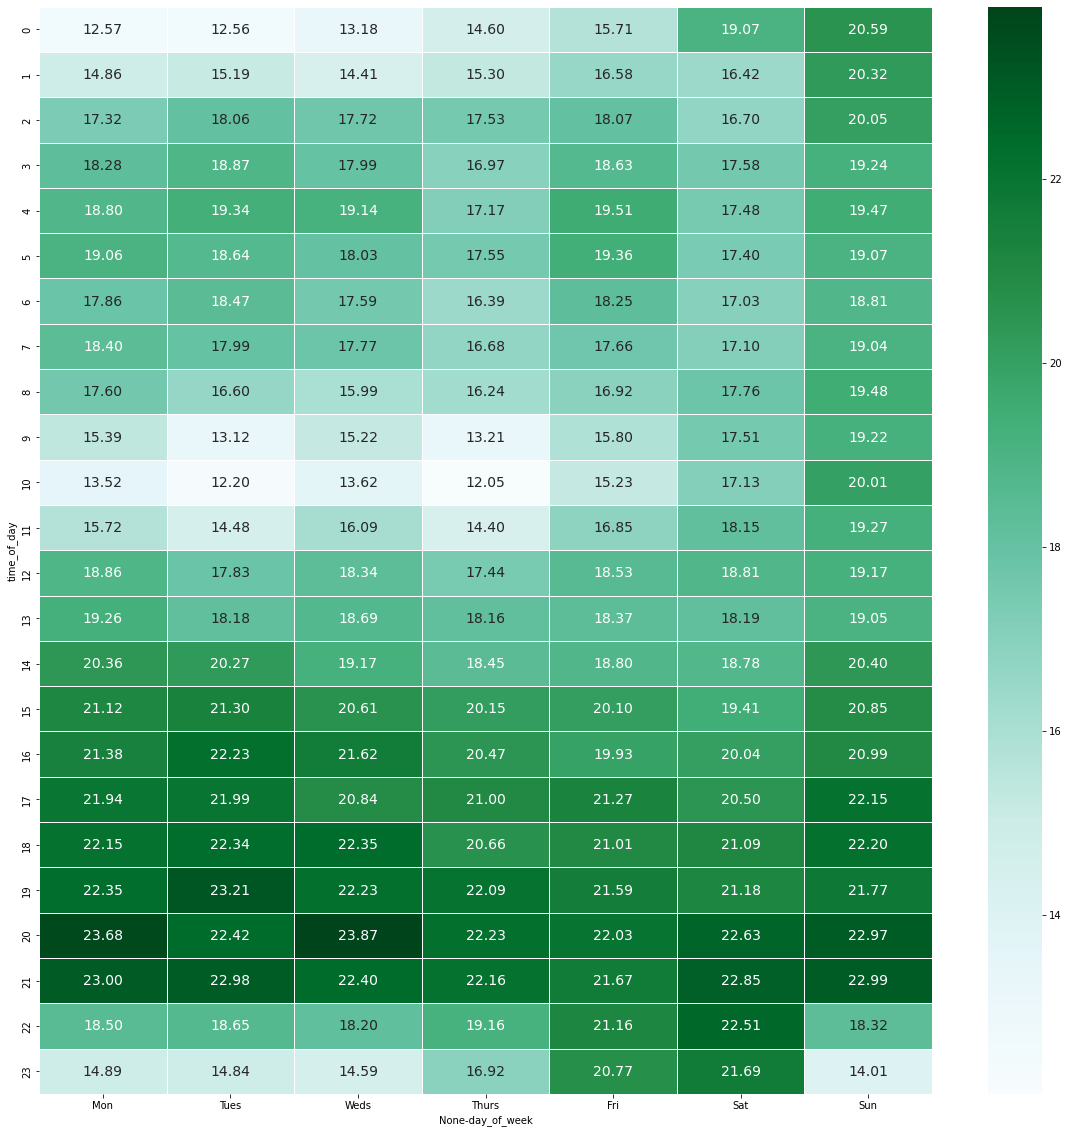

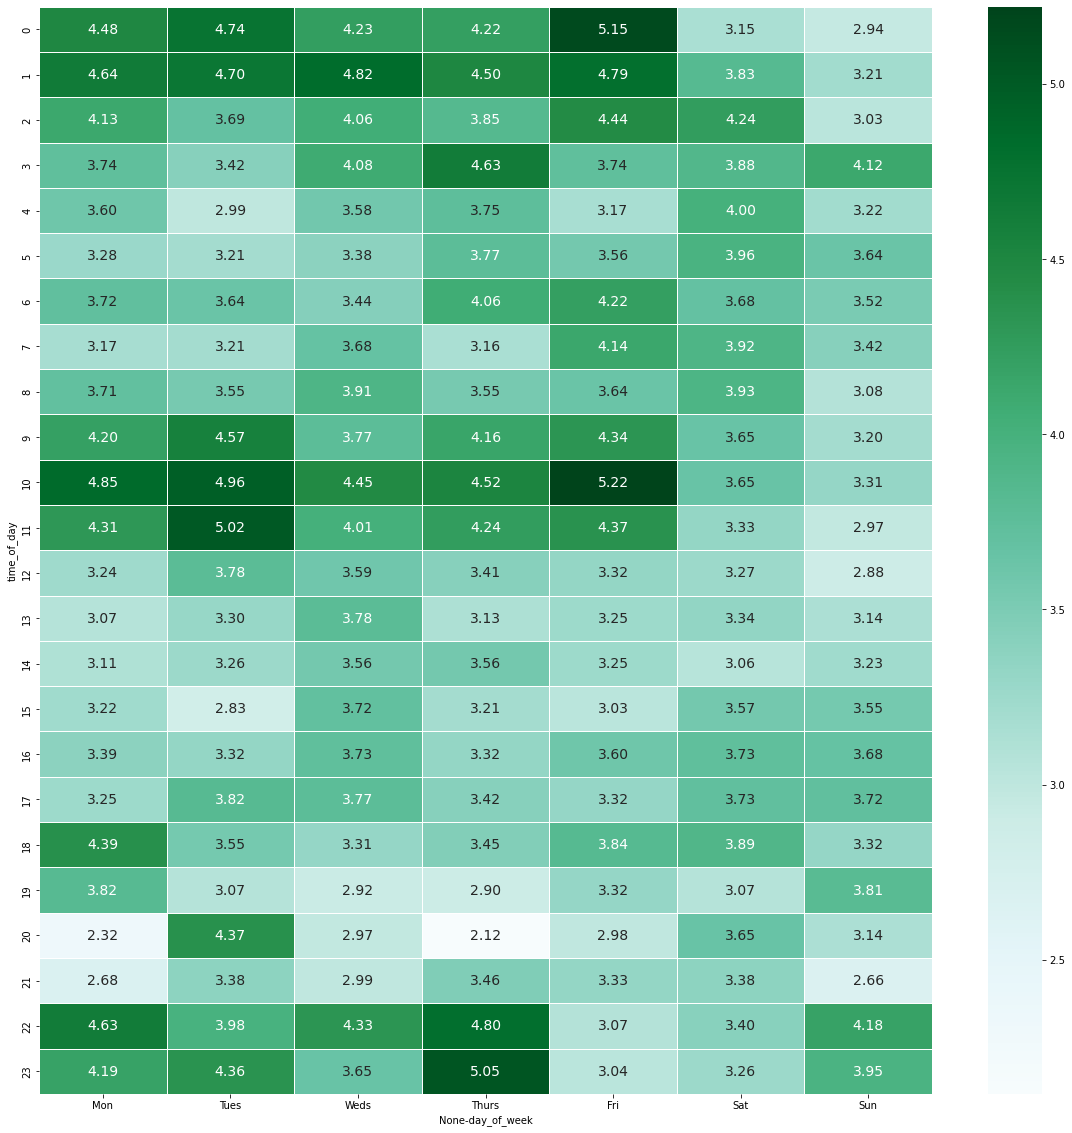

In [29]:
x_axis_labels = ['Mon', "Tues", "Weds", "Thurs", "Fri", "Sat", "Sun"]
speed_time_df = df[['time_of_day', 'day_of_week', 'median_speed']].groupby(
    ['time_of_day', 'day_of_week']).mean().unstack()

f = plt.figure(figsize=(20, 20))
sns.heatmap(speed_time_df,
        xticklabels=x_axis_labels,
        linewidths = 1, 
        annot = True, 
        fmt = ".2f", 
        annot_kws = {"size": 14}, 
        cmap = "BuGn")

speedvar_time_df = df[['time_of_day', 'day_of_week', 'median_speed']].groupby(
    ['time_of_day', 'day_of_week']).std().unstack()
f = plt.figure(figsize=(20, 20))
sns.heatmap(speedvar_time_df,
        xticklabels=x_axis_labels,
        linewidths = 1, 
        annot = True, 
        fmt = ".2f", 
        annot_kws = {"size": 14}, 
        cmap = "BuGn")

### Distribution plots

(13459,) (546469,)


/home/foolingeng/miniconda3/envs/posisi/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/foolingeng/miniconda3/envs/posisi/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_speed', ylabel='Density'>

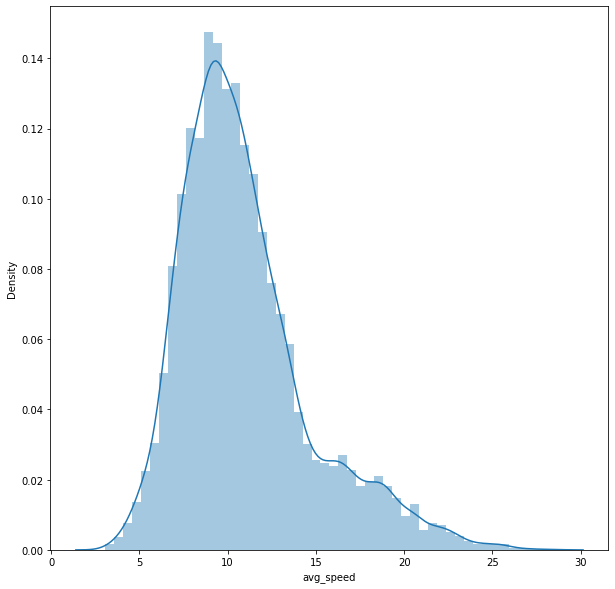

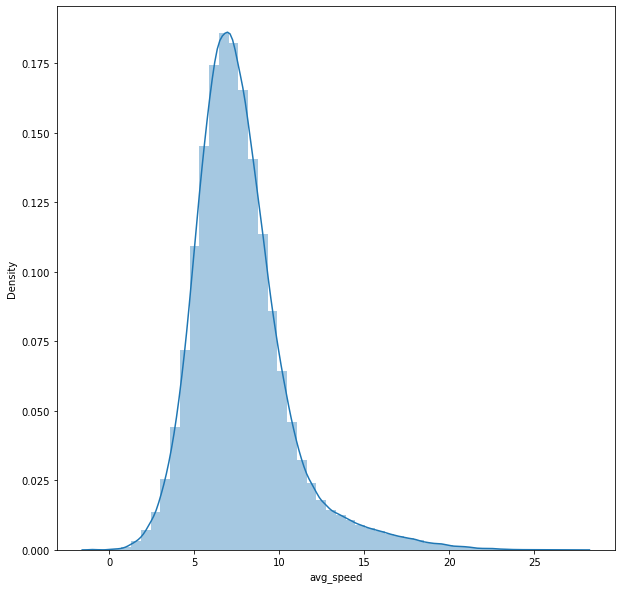

In [44]:
is_peak = (df['time_of_day'] >= 19) & (df['time_of_day'] <= 22)
non_peak = (df['time_of_day'] >= 11) & (df['time_of_day'] <= 13)
peak_median_speed = df['avg_speed'][is_peak]
nonpeak_median_speed = df['avg_speed'][~is_peak]

print(peak_median_speed.shape, nonpeak_median_speed.shape)
f = plt.figure(figsize=(10, 10))
sns.distplot(peak_median_speed)
f = plt.figure(figsize=(10, 10))
sns.distplot(nonpeak_median_speed)


In [64]:
# dude is this an equivalent:
# 1. make round(lng) column
# 2. make round(lat) column
# 3. aggregate and heatmap
df.columns, df.shape

(Index(['trj_id', 'driving_mode', 'osname', 'start_time', 'end_time', 'eta',
        'start_lat', 'end_lat', 'start_lng', 'end_lng', 'time_of_day',
        'day_of_week', 'avg_speed', 'median_speed', 'distance',
        'crowded_cost_raw', 'col_cost_raw', 'school_cost_raw',
        'supermarket_cost_raw', 'mrt_cost_raw', 'parks_cost_raw',
        'hawker_cost_raw', 'mall_cost_raw', 'is_crowded', 'is_real_value',
        'is_near_school', 'is_near_supermarket', 'is_near_mrt', 'is_near_park',
        'is_near_hawker', 'is_near_mall', 'crowded_cost', 'col_cost',
        'school_cost', 'supermarket_cost', 'mrt_cost', 'park_cost',
        'hawker_cost', 'mall_cost', 'start_hour', 'start_minute', 'end_hour',
        'end_minute'],
       dtype='object'),
 (279768, 43))

<AxesSubplot:xlabel='rounded_start_lng', ylabel='rounded_start_lat'>

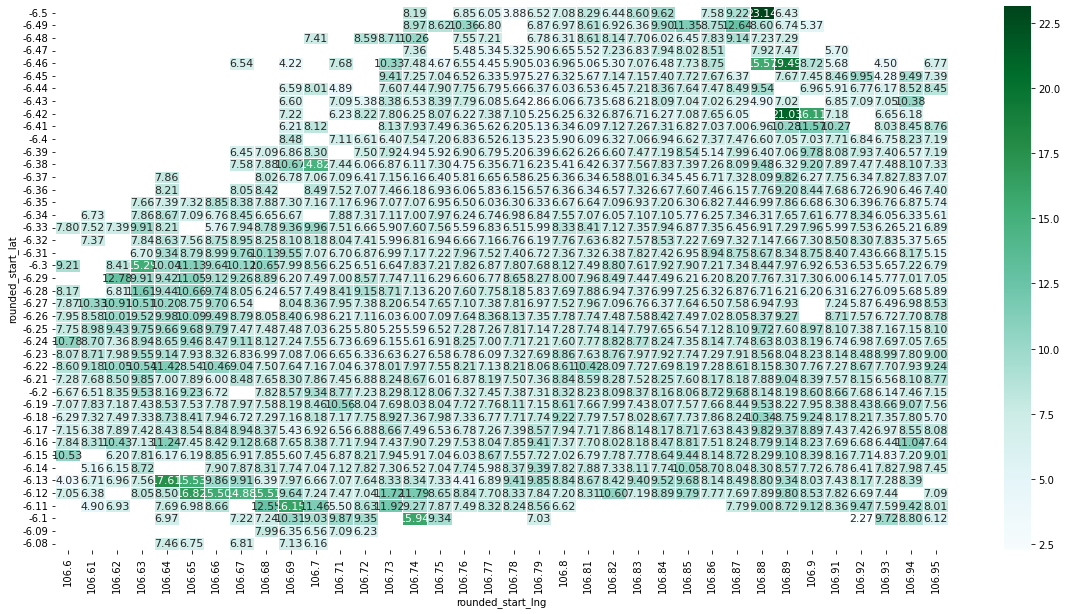

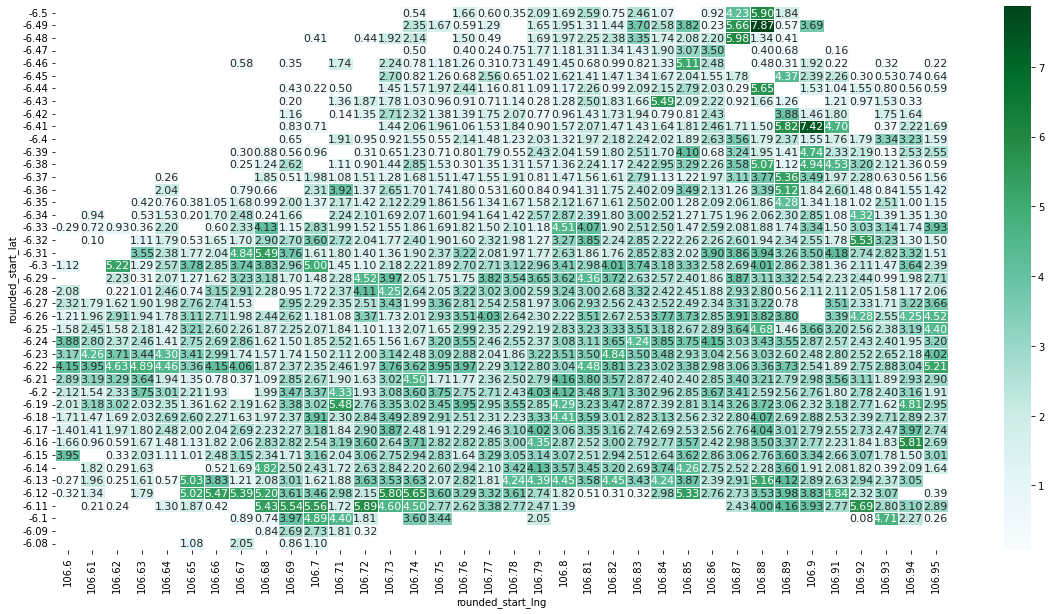

In [10]:
df['rounded_start_lat'] = df['start_lat'].round(2)
df['rounded_start_lng'] = df['start_lng'].round(2)
bounds = (df['rounded_start_lat'] >= -6.5) & (df['rounded_start_lat'] <= -6.08) & (df['rounded_start_lng'] >= 106.6) & (df['rounded_start_lng'] <= 106.95)

speed_location_df = df[['rounded_start_lat', 'rounded_start_lng', 'median_speed']][bounds].groupby(
    ['rounded_start_lat', 'rounded_start_lng']).mean().unstack()
speed_location_df.columns = speed_location_df.columns.droplevel()

f = plt.figure(figsize=(20, 10))
sns.heatmap(speed_location_df,
        linewidths = 1, 
        annot = True, 
        fmt = ".2f", 
        annot_kws = {"size": 11}, 
        cmap = "BuGn")

speed_location_var_df = df[['rounded_start_lat', 'rounded_start_lng', 'median_speed']][bounds].groupby(
    ['rounded_start_lat', 'rounded_start_lng']).std().unstack()
speed_location_var_df.columns = speed_location_var_df.columns.droplevel()

f = plt.figure(figsize=(20, 10))
sns.heatmap(speed_location_var_df,
        linewidths = 1, 
        annot = True, 
        fmt = ".2f", 
        annot_kws = {"size": 11}, 
        cmap = "BuGn")

/home/foolingeng/miniconda3/envs/posisi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Median Speed Standard Deviation')

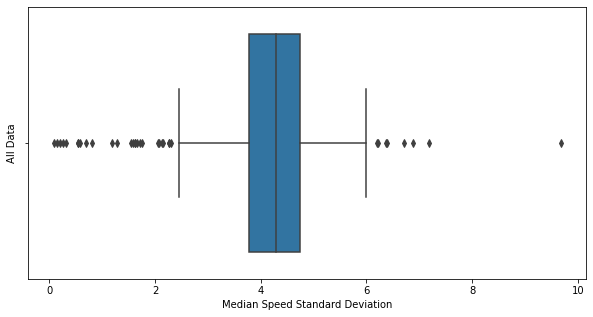

In [8]:
speed_vars_arr = speed_location_var_df.to_numpy()
speed_vars_arr = speed_vars_arr[~np.isnan(speed_vars_arr)]
# speed_vars_arr

f = plt.figure(figsize=(10, 5))
speed_var_plot = sns.boxplot(speed_vars_arr)
speed_var_plot.set_ylabel('All Data')
speed_var_plot.set_xlabel('Median Speed Standard Deviation')

In [7]:
df.columns

Index(['trj_id', 'driving_mode', 'osname', 'start_time', 'end_time', 'eta',
       'start_lat', 'end_lat', 'start_lng', 'end_lng', 'time_of_day',
       'day_of_week', 'avg_speed', 'median_speed', 'distance',
       'crowded_cost_raw', 'col_cost_raw', 'school_cost_raw',
       'supermarket_cost_raw', 'mrt_cost_raw', 'parks_cost_raw',
       'hawker_cost_raw', 'mall_cost_raw', 'is_crowded', 'is_real_value',
       'is_near_school', 'is_near_supermarket', 'is_near_mrt', 'is_near_park',
       'is_near_hawker', 'is_near_mall', 'crowded_cost', 'col_cost',
       'school_cost', 'supermarket_cost', 'mrt_cost', 'park_cost',
       'hawker_cost', 'mall_cost', 'start_hour', 'start_minute', 'end_hour',
       'end_minute', 'rounded_start_lat', 'rounded_start_lng'],
      dtype='object')

<AxesSubplot:xlabel='time_of_day', ylabel='eta'>

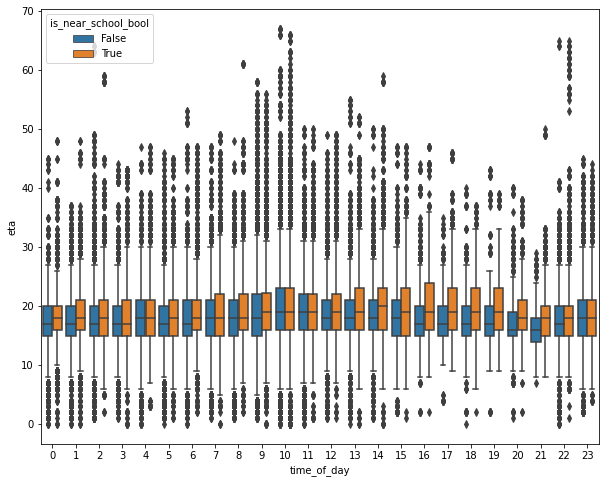

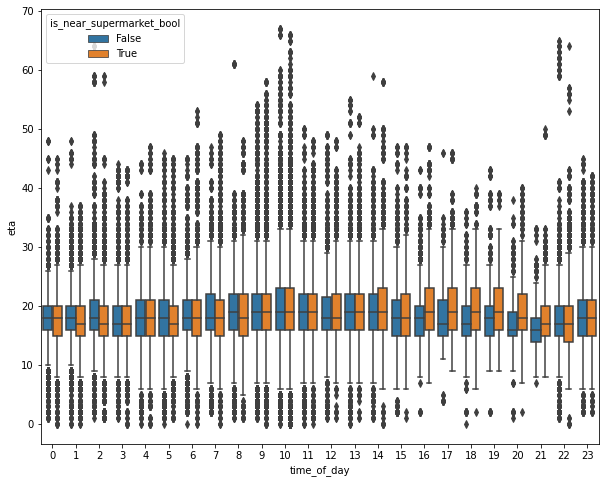

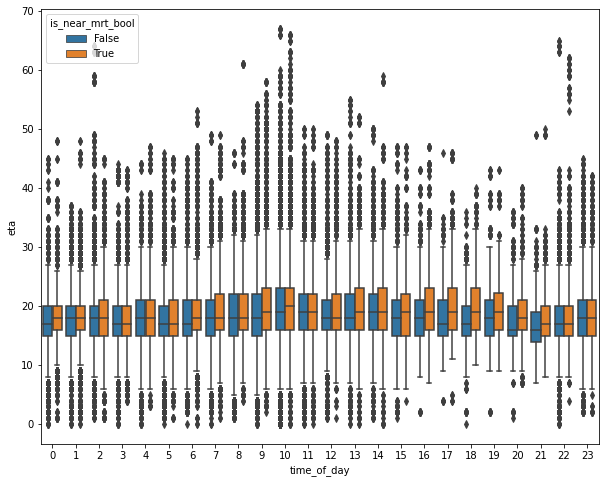

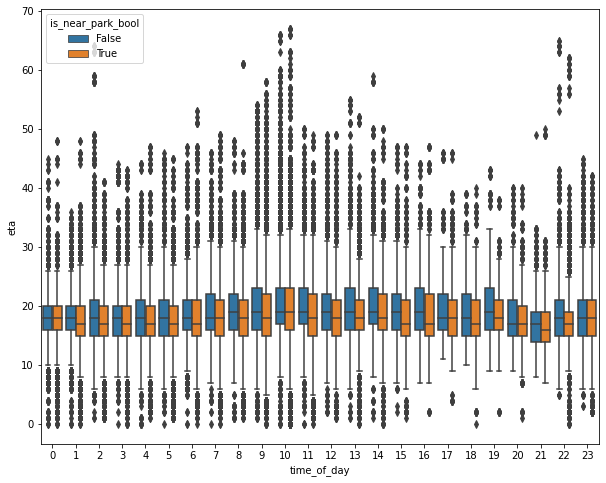

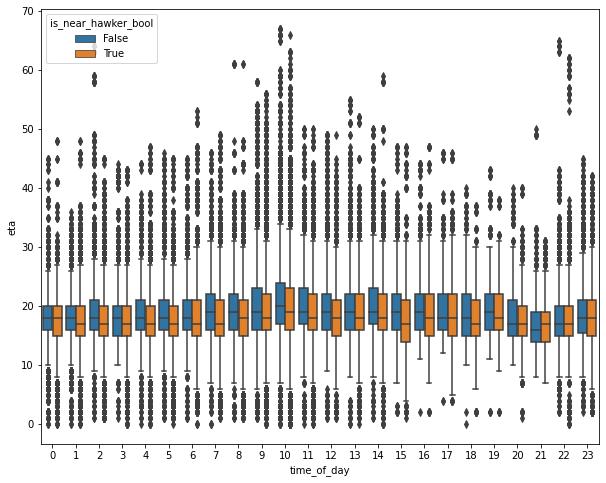

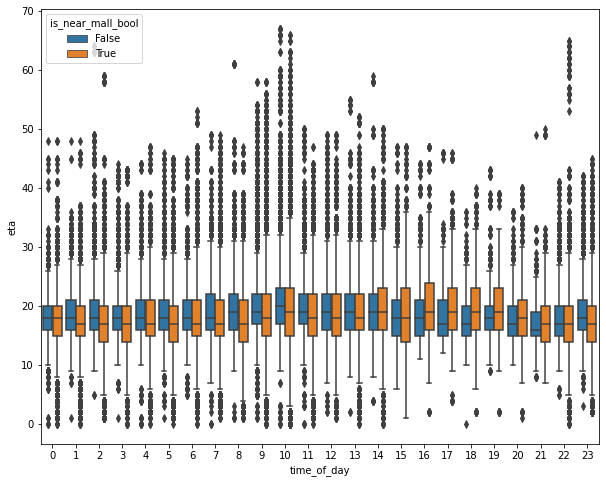

In [5]:
f = plt.figure(figsize=(10, 8))
df['is_near_school_bool'] = df['is_near_school'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_school_bool')

f = plt.figure(figsize=(10, 8))
df['is_near_supermarket_bool'] = df['is_near_supermarket'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_supermarket_bool')

f = plt.figure(figsize=(10, 8))
df['is_near_mrt_bool'] = df['is_near_mrt'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_mrt_bool')

f = plt.figure(figsize=(10, 8))
df['is_near_park_bool'] = df['is_near_park'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_park_bool')

f = plt.figure(figsize=(10, 8))
df['is_near_hawker_bool'] = df['is_near_hawker'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_hawker_bool')

f = plt.figure(figsize=(10, 8))
df['is_near_mall_bool'] = df['is_near_mall'] > 0.5
sns.boxplot(data=df, x='time_of_day', y='eta', hue='is_near_mall_bool')

<AxesSubplot:xlabel='is_weekend', ylabel='eta'>

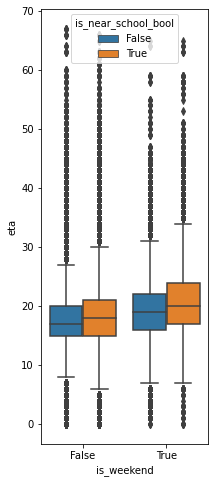

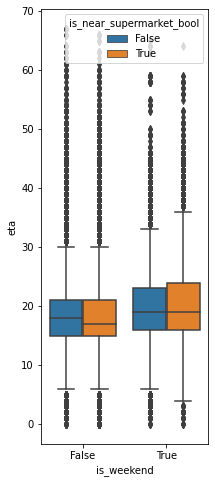

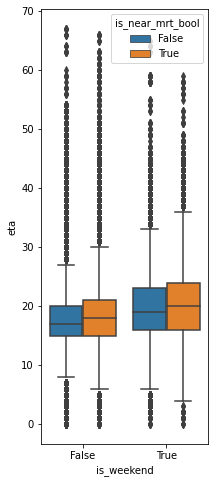

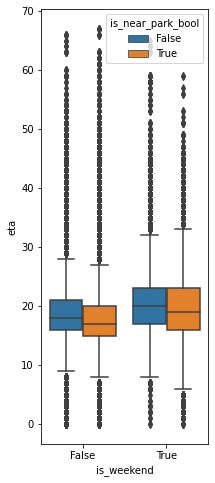

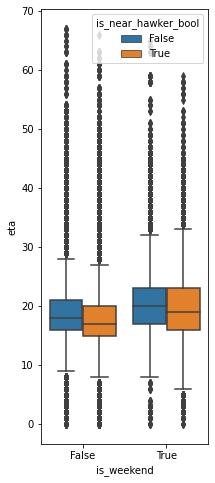

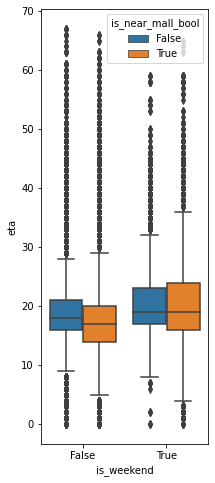

In [23]:
df['is_weekend'] = df['day_of_week'] >= 5

# test_df = df[['is_near_school_bool', 'is_near_supermarket_bool', 'is_near_mrt_bool', 'is_near_park_bool', 'is_near_hawker_bool', 'is_near_mall_bool', 'eta']]
# test_df.boxplot(column='eta', by=['is_near_school_bool', 'is_near_supermarket_bool'])
# sns.boxplot(x="variable", y="value", data=pd.melt(df))

f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_school_bool')
f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_supermarket_bool')
f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_mrt_bool')
f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_park_bool')
f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_hawker_bool')
f = plt.figure(figsize=(3, 8))
sns.boxplot(data=df, x='is_weekend', y='eta', hue='is_near_mall_bool')

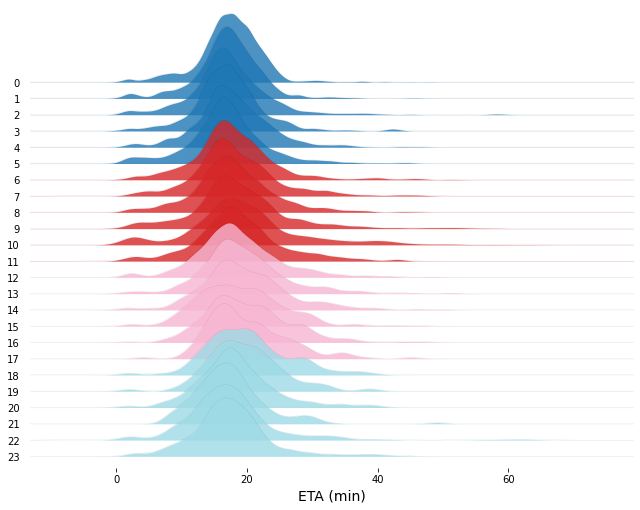

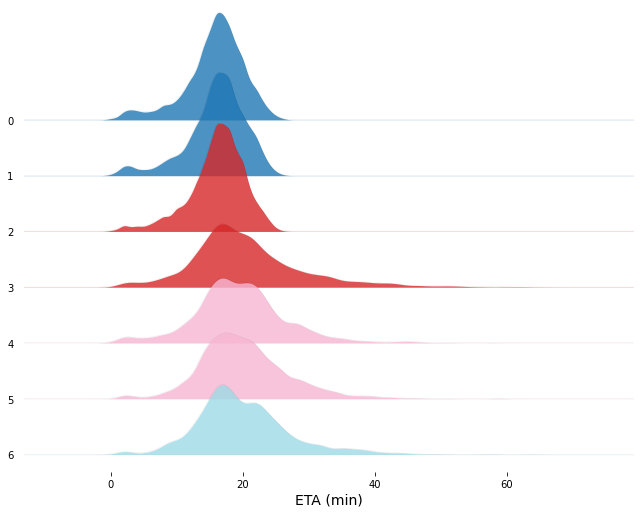

In [36]:
import joypy
fig, axes = joypy.joyplot(df[df['is_near_mall'] > 0.5], by="time_of_day", column="eta",figsize=(9,7),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
plt.xlabel('ETA (min)', fontsize=14)
fig.show()

fig, axes = joypy.joyplot(df[df['is_near_mall'] > 0.5], by="day_of_week", column="eta",figsize=(9,7),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
# axes[-1].set_xticklabels([i for i in range(0,67,10)]) 
plt.xlabel('ETA (min)', fontsize=14)
fig.show()

In [3]:
# df.to_parquet('sg_trip_info_for_visualise.parquet')
# df.to_parquet('jakarta_trip_info_for_visualise.parquet')
# df = pd.read_parquet('sg_trip_info_for_visualise.parquet')
# df = df[df['eta'] < 70]
# print(df.shape)
df

(279728, 51)


,trj_id,driving_mode,osname,start_time,end_time,eta,start_lat,end_lat,start_lng,end_lng,...,end_hour,end_minute,rounded_start_lat,rounded_start_lng,is_near_school_bool,is_near_supermarket_bool,is_near_mrt_bool,is_near_park_bool,is_near_hawker_bool,is_near_mall_bool
trj_id,,,,,,,,,,,,,,,,,,,,,
10,10,car,android,2019-04-09 11:26:02,2019-04-09 11:44:56,18,1.301234,1.358001,103.799842,103.845160,...,11,44,1.30,103.80,True,True,True,True,True,False
100,100,car,ios,2019-04-16 02:44:23,2019-04-16 03:00:27,16,1.344231,1.336072,103.938409,103.843437,...,3,0,1.34,103.94,True,True,True,False,True,False
1000,1000,car,ios,2019-04-11 00:49:41,2019-04-11 01:03:43,14,1.434889,1.369239,103.788572,103.860963,...,1,3,1.43,103.79,False,False,False,False,False,False
10001,10001,car,android,2019-04-17 11:57:37,2019-04-17 12:15:56,18,1.370893,1.327447,103.832677,103.752161,...,12,15,1.37,103.83,False,False,False,True,True,False
10004,10004,car,ios,2019-04-09 03:13:19,2019-04-09 03:26:44,13,1.425745,1.392794,103.770933,103.908432,...,3,26,1.43,103.77,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,997,car,ios,2019-04-12 07:36:26,2019-04-12 07:56:08,19,1.318928,1.368076,103.847829,103.945997,...,7,56,1.32,103.85,True,True,True,False,True,False
9970,9970,car,android,2019-04-18 09:25:42,2019-04-18 09:54:53,29,1.434793,1.316889,103.788481,103.873316,...,9,54,1.43,103.79,False,False,True,True,False,False
998,998,car,ios,2019-04-18 22:30:33,2019-04-18 22:51:01,20,1.334752,1.296571,103.698884,103.852597,...,22,51,1.33,103.70,False,True,True,True,True,True
